In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_excel(r"C:\Users\nikit\Downloads\Python Folder\DataSet\Superstore_USA.xlsx")
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [56]:
df.shape

(9426, 24)

In [57]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [58]:
df['Product Base Margin'] = df['Product Base Margin'].fillna(df['Product Base Margin'].mean())

In [59]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [60]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [61]:
#df['Order Priority'].unique()

In [62]:
df['Order Priority'] = df['Order Priority'].replace('Critical ', 'Critical')

In [63]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

### Number of Orders by Priority

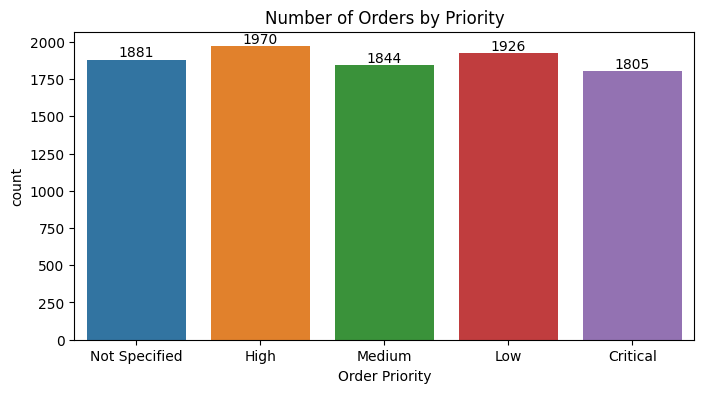

In [64]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'Order Priority', data = df, hue = 'Order Priority')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Orders by Priority')
plt.savefig('Number of Orders by Priority.jpg')

### Shipping Mode

In [65]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [66]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values
y

array([7036, 1283, 1107])

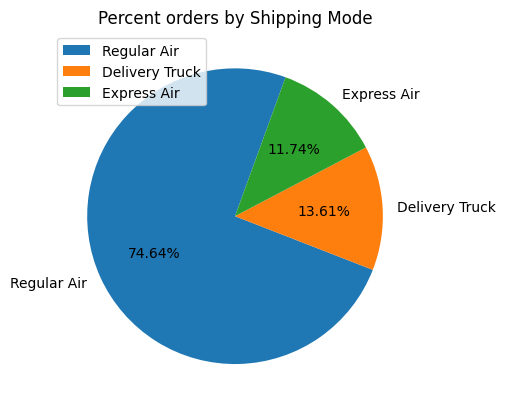

In [69]:
plt.pie(y, labels = x, autopct = '%0.2f%%', startangle = 70)
plt.title('Percent orders by Shipping Mode')
plt.legend(loc = 2)
plt.savefig('Percent orders by Shipping Mode')
plt.show()

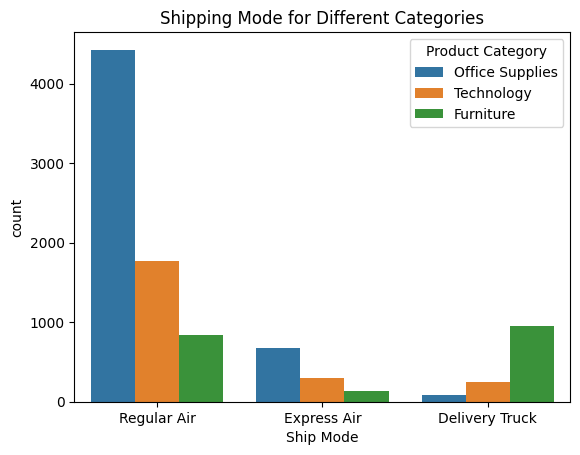

In [70]:
sns.countplot(x = 'Ship Mode', data = df, hue = 'Product Category')
plt.title('Shipping Mode for Different Categories')
plt.savefig('Shipping Mode for Different Categories')
plt.show()

### Customer Segment

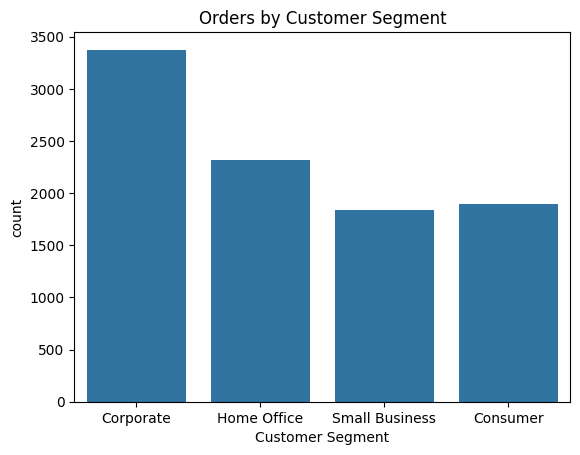

In [71]:
sns.countplot(x = 'Customer Segment', data = df)
plt.title('Orders by Customer Segment')
plt.savefig('Orders by Customer Segment')
plt.show()

### Product Category

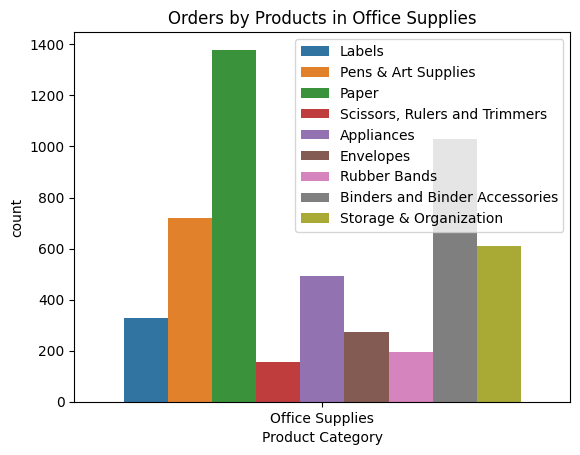

In [87]:
sns.countplot(x = 'Product Category', data = df[df['Product Category'] == 'Office Supplies'], hue = 'Product Sub-Category')
plt.title('Orders by Products in Office Supplies')
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1))
plt.savefig('Orders by Products in Office Supplies')
plt.show()

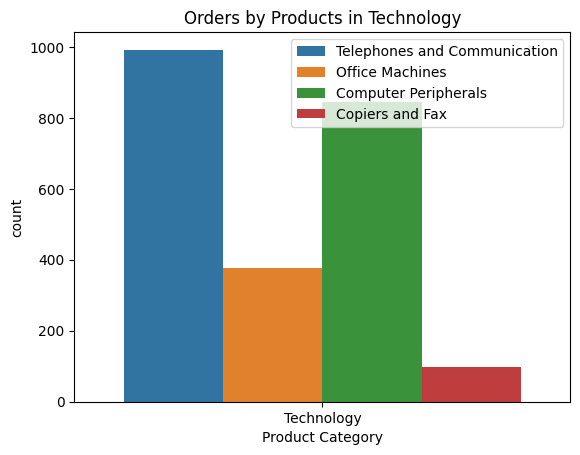

In [88]:
sns.countplot(x = 'Product Category', data = df[df['Product Category'] == 'Technology'], hue = 'Product Sub-Category')
plt.title('Orders by Products in Technology')
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1))
plt.savefig('Orders by Products in Technology')
plt.show()

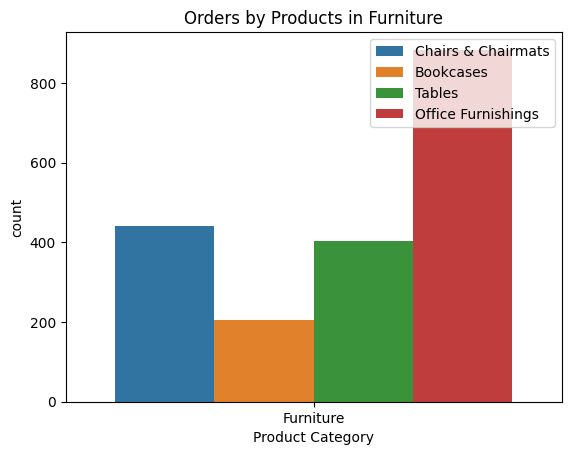

In [89]:
sns.countplot(x = 'Product Category', data = df[df['Product Category'] == 'Furniture'], hue = 'Product Sub-Category')
plt.title('Orders by Products in Furniture')
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1))
plt.savefig('Orders by Products in Furniture')
plt.show()

### Time Series EDA

In [75]:
df[['Ship Date', 'Order Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ship Date   9426 non-null   datetime64[ns]
 1   Order Date  9426 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 147.4 KB


In [76]:
df['Order Year'] = df['Order Date'].dt.year

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [78]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

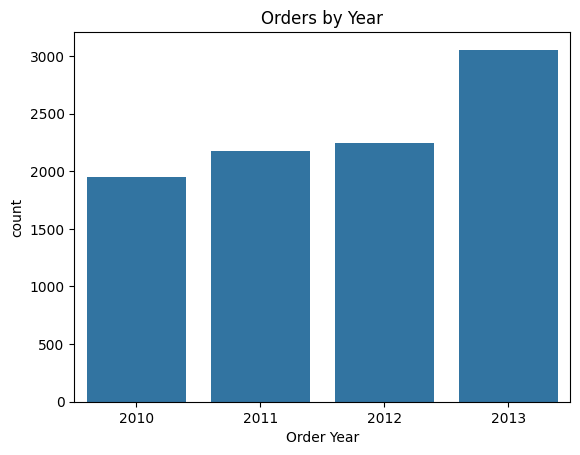

In [79]:
sns.countplot(x = 'Order Year', data = df)
plt.title('Orders by Year')
plt.savefig('Orders by Year')
plt.show()

### Profit

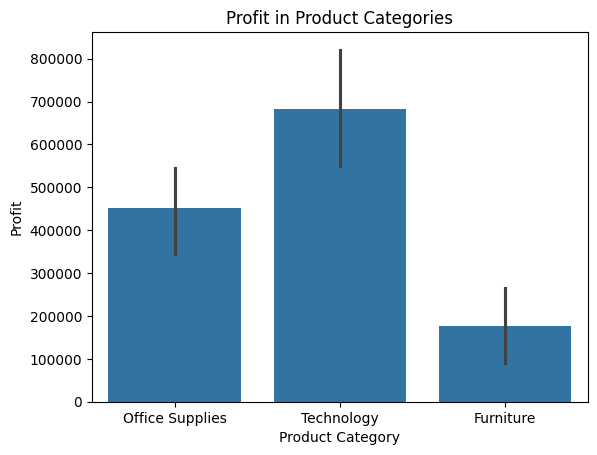

In [80]:
sns.barplot(x = 'Product Category', y = 'Profit', data = df, estimator = 'sum')
plt.title('Profit in Product Categories')
plt.savefig('Profit in Product Categories')
plt.show()

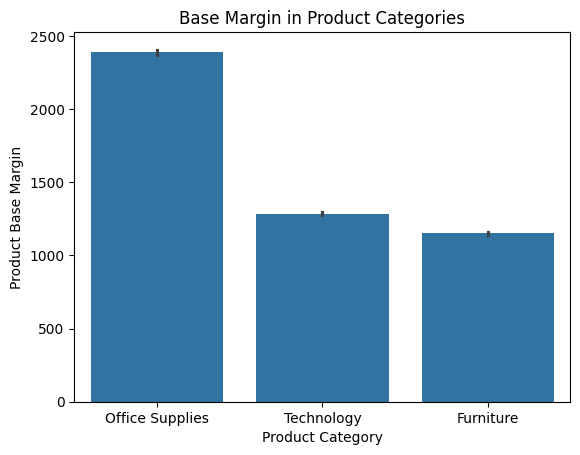

In [81]:
sns.barplot(x = 'Product Category', y = 'Product Base Margin', data = df, estimator = 'sum')
plt.title('Base Margin in Product Categories')
plt.savefig('Base Margin in Product Categories')
plt.show()

In [82]:
df['State or Province'].value_counts()[:5]


State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64